In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Define the column names for csv file
column_names = ['Center', 'Left', 'Right', 'Steering', 'Throttle', 'Brake', 'Speed']

In [27]:
# Load the csv file
data = pd.read_csv('driving_log.csv', header=None, names=column_names)
data.head()

,Center,Left,Right,Steering,Throttle,Brake,Speed
0,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,0.0,0.0,0.0,0.649786
1,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,0.0,0.0,0.0,0.627942
2,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,0.0,0.0,0.0,0.622910
3,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,0.0,0.0,0.0,0.619162
4,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,D:\Hoc Tap\AllThingsOfCPA\Sem7\CVI\Final_Proje...,0.0,0.0,0.0,0.615438


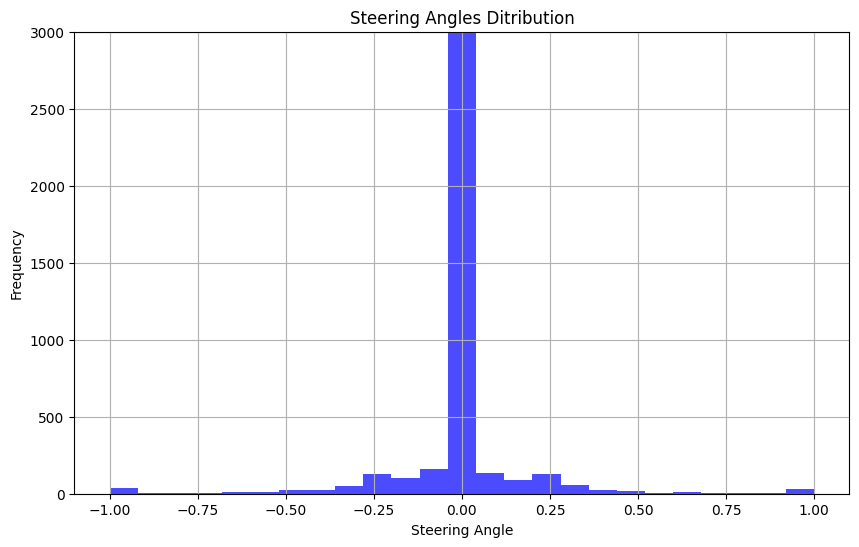

In [28]:
# Extract Steering angles
steering_angles = data['Steering']
num_bins = 25
samples_per_bin = 400

# Plot the histogram of steering angles
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(steering_angles, bins=num_bins, color='blue', alpha=0.7)
plt.ylim(0, 3000)
plt.title("Steering Angles Ditribution")
plt.xlabel("Steering Angle")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:

remove_list = []
for i in range(num_bins):
    list_ = []
    for j in range(len(data['Steering'])):
        # Check the steering angle value, if it falls within a bin range, then add them together
        if data['Steering'][j] >= bins[i] and data['Steering'][j] <= bins[i+1]:
            list_.append(j)
    list_ = shuffle(list_)

    # If the number of samples in the bin is greater than the samples_per_bin,
    # remove the excess samples
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print("Removing %d samples" % len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print("Remaining %d samples" % len(data))



Removing 2590 samples
Remaining 1463 samples


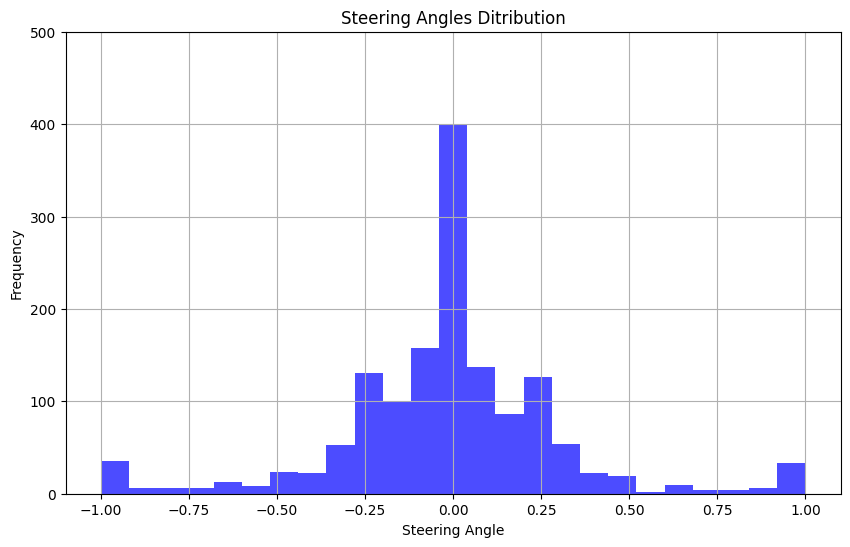

In [31]:
# Plot the histogram after removing excess data of steering angles
plt.figure(figsize=(10, 6))
hist, bins, _ = plt.hist(data['Steering'], bins=num_bins, color='blue', alpha=0.7)
plt.ylim(0, 500)
plt.title("Steering Angles Ditribution")
plt.xlabel("Steering Angle")
plt.ylabel('Frequency')
plt.grid(True)
plt.show()